# Exercise 3 – Neutral Theory and emergent pattern in Ecology

### Federico Agostini, Federico Bottaro, Gianmarco Pompeo

## Task 1

Divide the 50-hectar plots in N=800 subplots of equal area. We will assume that these are independent and we can do the statistics on these plots. Calculate: a) the vector of the abundances for all the species (x 1 ,...,x S ) for each subplot; In this way you have a N*S matrix, where each row represent the statistics of abundances in one subplot. b) Transform the matrix in one big vector of N*S component and remove all the 0s in the vector. The resulting vector – let us call it X contains all information about “present” species in our statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['grid.color'] = 'gray'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.alpha'] = 0.5
mpl.rcParams['grid.linewidth'] = 0.5
%matplotlib inline
import pandas as pd
import seaborn as sns
from math import factorial

In [2]:
# read data file
data_full = pd.read_csv("bci05.csv")
data_full.describe()

,tag,gx,gy,dbh,pom,date
count,368122.000000,368035.000000,368035.000000,208387.000000,368122.000000,368070.000000
mean,262011.545901,494.356946,254.214007,49.337660,0.696302,8912.050490
std,201947.633329,291.017349,144.039966,83.399585,0.653746,77.962794
min,-42299.000000,0.000000,0.000000,10.000000,0.000000,8768.000000
25%,107171.250000,237.800000,130.300000,16.000000,0.000000,8841.000000
50%,210413.500000,492.200000,254.700000,25.000000,1.000000,8915.000000
75%,409068.750000,747.700000,380.100000,47.000000,1.000000,8975.000000
max,749571.000000,999.900000,499.900000,2765.000000,5.000000,9154.000000


In [3]:
# keep only data for ALIVE species
data_full = data_full[data_full["status"] == 'A']
data = data_full[["sp","gx", "gy"]]
S = data["sp"].nunique()
Species = data["sp"].unique()
print("# species (S) =", S)
print("# alive trees =", data["sp"].count())
print("Species list:", Species)

# species (S) = 299
# alive trees = 208387
Species list: ['ACACME' 'ACALDI' 'ACALMA' 'ADE1TR' 'AEGIPA' 'ALCHCO' 'ALCHLA' 'ALIBED'
 'ALLOPS' 'ALSEBL' 'AMAICO' 'ANACEX' 'ANAXPA' 'ANDIIN' 'ANNOAC' 'ANNOSP'
 'APEIME' 'APEITI' 'APHESI' 'APPUSE' 'ARDIBA' 'ARDIFE' 'ARDIGU' 'ASPICR'
 'AST1ST' 'AST2GR' 'BACTBA' 'BACTC1' 'BACTMA' 'BEILPE' 'BOROPA' 'BROSAL'
 'BROSGU' 'CALOLO' 'CAPPFR' 'CASEAC' 'CASEAR' 'CASECO' 'CASEGU' 'CASESY'
 'CASSEL' 'CAVAPL' 'CECRIN' 'CECRLO' 'CECROB' 'CEDROD' 'CEIBPE' 'CELTSC'
 'CESPMA' 'CESTME' 'CHA1TE' 'CHA2SC' 'CHIMPA' 'CHR1EC' 'CHR2AR' 'CHR2CA'
 'CLIDDE' 'CLIDOC' 'CLIDSE' 'COCCCO' 'COCCMA' 'COLUGL' 'CONOBR' 'CONOCI'
 'CORDAL' 'CORDBI' 'CORDLA' 'COU2CU' 'COUTHE' 'CROTBI' 'CUPACI' 'CUPALA'
 'CUPARU' 'CUPASY' 'CYPHHA' 'DENDAR' 'DES2PA' 'DIO2AR' 'DIPTPA' 'DRYPST'
 'ELAEOL' 'ENTESC' 'ERY1CO' 'ERY2MA' 'ERY2PA' 'EUGECO' 'EUGEGA' 'EUGENE'
 'EUGEOE' 'FARAOC' 'FICUBU' 'FICUC2' 'FICUCI' 'FICUIN' 'FICUMA' 'FICUOB'
 'FICUPO' 'FICUTO' 'FICUTR' 'FICUYO' 'GAR2IN' 'GAR2MA' 'GENIAM' 'GU

In [4]:
# divide the data in 800 subplots
## xaxis divided in 50 parts
## yaxis divided in 16 parts
xdiv = np.linspace(0, 1000, 51)
ydiv = np.linspace(0,  500, 17)

subplot = []
df = pd.DataFrame()

for i in range(len(xdiv)-1):
    for j in range(len(ydiv)-1):
        df = data[data["gx"] >= xdiv[i]  ]
        df =   df[  df["gx"] <  xdiv[i+1]]
        df =   df[  df["gy"] >= ydiv[j]  ]
        df =   df[  df["gy"] <  ydiv[j+1]]
        subplot.append(df)

In [5]:
# the ij element indicates the abundance of species j in subplot i
# rows i    -> subplots
# columns j -> species
abundance_matrix = np.zeros((len(subplot), S))
for i, df in enumerate(subplot):
    for j, p in enumerate(Species):
        n = df[df["sp"] == p].shape[0]
        abundance_matrix[i,j] = n
print(abundance_matrix.shape)
abundance_matrix

(800, 299)


array([[ 0., 19.,  8., ...,  0.,  0.,  0.],
       [ 0.,  2.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  2.,  0., ...,  0.,  0.,  0.],
       [ 0.,  3.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  2.,  0.,  0.]])

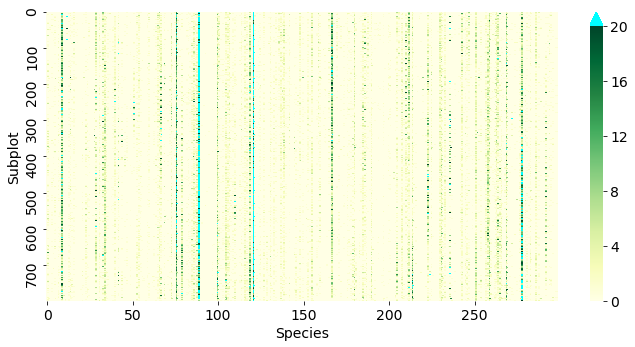

In [6]:
# plot the abundance matrix as a heatmap
fig, ax = plt.subplots(figsize=(10,5))
fig.tight_layout(pad=2.5)
cmap = plt.cm.get_cmap("YlGn")
cmap.set_over("cyan")
sns.heatmap(abundance_matrix, cmap=cmap, square=False, xticklabels=50, yticklabels=100, ax=ax, vmax=20, 
            cbar_kws={"extend":"max"})
ax.set_xlabel("Species", fontsize=14)
ax.set_ylabel("Subplot", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
fig.savefig("./Figure/abundance_matrix.pdf")

In [7]:
abundance_vector = abundance_matrix.reshape(abundance_matrix.shape[0]*abundance_matrix.shape[1],)
abundance_vector = abundance_vector[abundance_vector > 0]
print(abundance_vector.shape)
print(np.unique(abundance_vector).shape)

(49563,)
(113,)


## Task 2

Build the empirical cumulative distribution function from X, i.e. calculate the probability that picking a species at random it has an abundance equal or greater than x, i.e. $P_>(x)$. Of course $P_>(1)=1$. This is the cumulative of the Relative Specie Abundance (RSA)

In [8]:
unique_values = np.unique(abundance_vector)
ecdf = []
for i in unique_values:
    ecdf.append(np.sum(abundance_vector>=i)/len(abundance_vector))


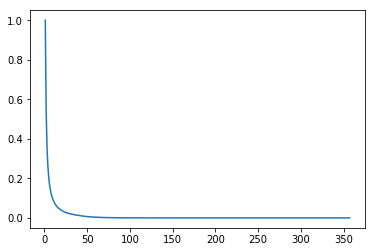

In [9]:
plt.plot(unique_values, ecdf)

## Task 3

Compare the stationary solution of the birth and death ME with birth rate $b_n =bn$ and death rate $d_n =dn$ and immigration $b_0=m$ with the cumulative RSA, knowing that experimentally the immigration rate has been measured and it is $m=0.05$. Notes: 

1. you need to use the cumulative distribution of the solution; 
2. you need normalize the solution of the birth and death ME from 1 to $\infty$ (not from 0).

$$\sum_{n=1}^{\infty} \frac{\nu(1-\nu)^{n-1}}{n} = \frac{\nu \log \nu}{\nu-1}$$

In [10]:
def f(x, nu=0.05):
    return (nu*(1-nu)**(x-1))/x

nu=0.05
norm = nu*np.log(nu)/(nu-1)
print(norm)
n = unique_values.copy()
prob = f(n)/norm
print(prob.sum())
th_ecdf = []
for i in range(len(prob)):
    th_ecdf.append(np.sum(prob[i:]))

0.15767011966073638
0.9997114383429463


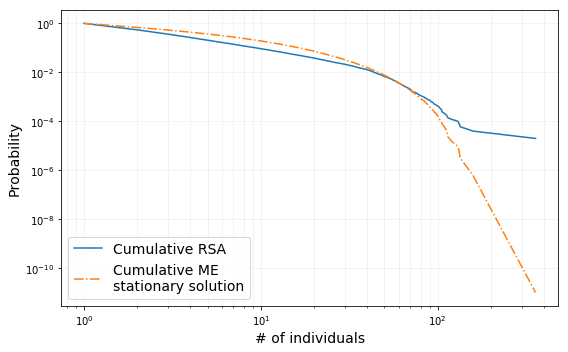

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(unique_values, ecdf, label="Cumulative RSA")
ax.plot(unique_values, th_ecdf, "-.", label="Cumulative ME\nstationary solution")
ax.set_xlabel("# of individuals", fontsize=14)
ax.set_ylabel("Probability", fontsize=14)
ax.legend(loc="best", fontsize=14)
ax.grid(True, which="both")
fig.tight_layout()
fig.savefig("./Figure/cumRSA_log.pdf")


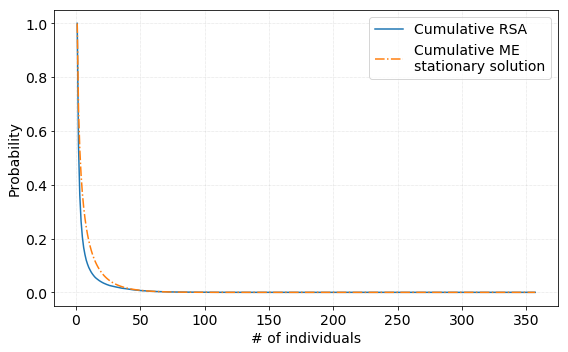

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(unique_values, ecdf, label="Cumulative RSA")
ax.plot(unique_values, th_ecdf, "-.", label="Cumulative ME\nstationary solution")
ax.set_xlabel("# of individuals", fontsize=14)
ax.set_ylabel("Probability", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc="best", fontsize=14)
ax.grid(True)
fig.tight_layout()
fig.savefig("./Figure/cumRSA.pdf")

## Task 4

*OPTIONAL:* Build the empirical Species Area relationship in the BCIforest, i.e. calculate the different number of species for increasing area building the curve $<S(ja/A)>$ where $a=$ area of the subplot, $A=$ total area and $j=1, \dots, N$). Of course you need to perform averages. Compare the empirical curve with the prediction from Neutral Theory in a well-mixed ecosystem that I have presented in class (doing the best fit for the free parameter m).

In [13]:
# divide the data in N=1, ..., 800 subplots
## xaxis divided in N parts

def SAR():
    N = np.arange(1,801)

    xdiv = 1000/N
    ydiv = 500

    df = pd.DataFrame()
    N_species_average = []
    N_species_error   = []

    for N in range(1,801):
        if N%50 == 0: print("N =", N)
        xdiv = np.linspace(0, 1000, N+1)
        subplot = []
        N_species = []
        for i in range(len(xdiv)-1):
            df = data[data["gx"] >= xdiv[i]  ]
            df =   df[  df["gx"] <  xdiv[i+1]]
            n = df["sp"].nunique()
            N_species.append(n)
        mean  = np.mean(np.array(N_species))
        error = np.std(np.array(N_species))/N**0.5
        N_species_average.append(mean)
        N_species_error.append(error) 
    return N_species_average, N_species_error
        

In [14]:
from os.path import isfile

np.random.seed(20190512)

mean_path  = "./Mean.gz"
error_path = "./Error.gz"

if isfile(mean_path) and isfile(error_path):
    print("Mean & Error list found: loading data")
    N_species_average = np.loadtxt(mean_path)
    N_species_error   = np.loadtxt(error_path)
else:
    N_species_average, N_species_error = SAR()
    np.savetxt("Mean.gz" , N_species_average)
    np.savetxt("Error.gz", N_species_error)

Mean & Error list found: loading data


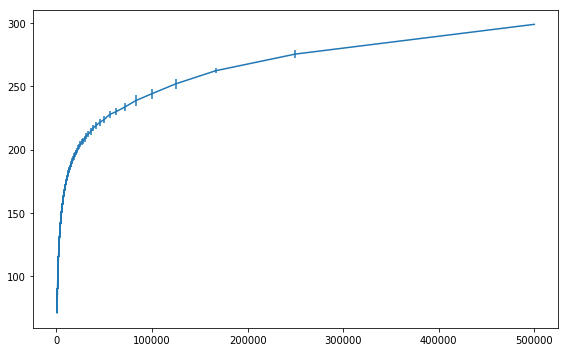

In [15]:
Area = 500*1000/np.arange(1,801)
fig, ax = plt.subplots(figsize=(8,5))
ax.errorbar(x=Area, y=N_species_average, yerr=N_species_error)
fig.tight_layout()
#fig.savefig("./Figure/SAR.pdf")

In [16]:
from scipy.optimize import curve_fit

def SMean(x,m):
    A = 1000*500
    return S*(1- np.log(x/A*(1-m)+m)/np.log(m))

popt, popcov = curve_fit(SMean, Area, N_species_average, p0=1e-10)

print("m =", popt, "+/-", popcov)


m = [0.00016011] +/- [[1.04752765e-12]]


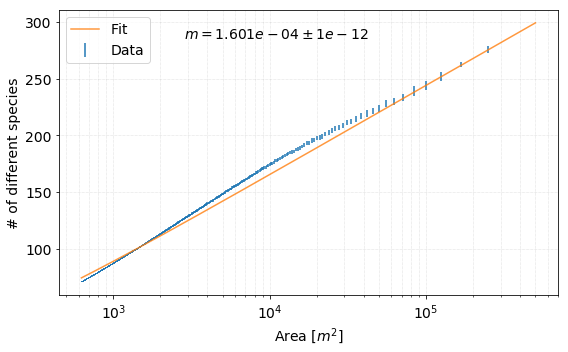

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set_xscale("log")
ax.errorbar(x=Area, y=N_species_average, yerr=N_species_error, label="Data", fmt="none")
ax.plot(Area, SMean(Area, popt), label="Fit", alpha=0.8)
ax.legend(loc="best", fontsize=14)
ax.set_xlabel("Area [$m^2$]", fontsize=14)
ax.set_ylabel("# of different species", fontsize=14)
ax.grid(True, which="both")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.annotate("$m={:.3e} \\pm {:1.0e}$".format(float(popt), float(popcov)), xy=(.25, .9), 
            xycoords="axes fraction", fontsize=14)
fig.tight_layout()
fig.savefig("./Figure/SAR_log.pdf")

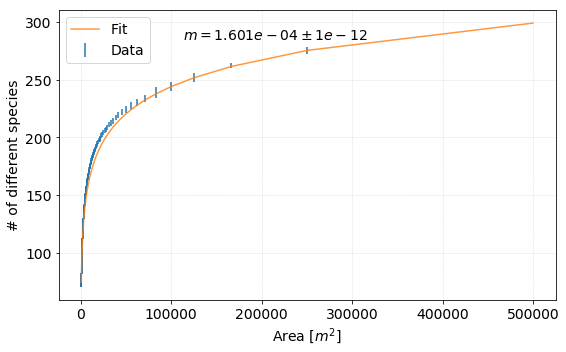

In [18]:
fig, ax = plt.subplots(figsize=(8,5))
ax.errorbar(x=Area, y=N_species_average, yerr=N_species_error, label="Data", fmt="none")
ax.plot(Area, SMean(Area, popt), label="Fit", alpha=0.8)
ax.legend(loc="best", fontsize=14)
ax.set_xlabel("Area [$m^2$]", fontsize=14)
ax.set_ylabel("# of different species", fontsize=14)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.annotate("$m={:.3e} \\pm {:1.0e}$".format(float(popt), float(popcov)), xy=(.25, .9), 
            xycoords="axes fraction", fontsize=14)
fig.tight_layout()
fig.savefig("./Figure/SAR.pdf")

## Task 5

Logistic Growth. Another widespread model for population dynamics used in ecology is the so called logistic model, where species abundance initially grows exponentially but then reaches a carrying capacity K. There are several microscopic derivations that give the same logistic behavior. In particular consider the reactions:

1. Birth: $A \to A+A$ with probability b (per unit time and per particle);
2. Migration: $0 \to A$ with probability m (x unit time and x particle);
3. Death: $A \to 0$ with prob. d(A)=b A / K (x unit time and x particle).

Write the transition rate $W^+(A)=W(A \to A+1)$ (summing both 1+2) and $W^-(A)=W(A \to A-1)$ (using 3) for the population dynamics of 1 species. Write the corresponding Birth and death Master equation a as function of the stationary state. Plot it for $m=0.1$, $b=1$ and $K=10$ (P(0) can be calculated numerically).

**Formula 1**
$$P_n^* = \prod_{n=0}^{A-1}\frac{nb+m}{\frac{bn^2}{k}} = \frac{\prod_{n=0}^{A-1}nb+m}{\left(\frac{b}{k}\right)^A(A!)^2}$$

**Formula 2**
$$P_n^* = \prod_{i=n}^{A-1}\frac{nb+m(k-i)}{\frac{bn^2}{k}} = \frac{\prod_{n=0}^{A-1}nb+m(k-n)}{\left(\frac{b}{k}\right)^A(A!)^2}$$

**Formula 3**
$$P_n^* = \prod_{n=0}^{A-1}\frac{(nb+m)(k-i)}{\frac{bn^2}{k}} = \frac{\prod_{n=0}^{A-1}(nb+m)(k-i)}{\left(\frac{b}{k}\right)^A(A!)^2}$$

In [19]:
def LG1(a, m=1, b=1, k=10):
    num = np.prod(np.arange(a)*b+m)          # np.arange(a) = 0, 1, ... , a-1
    den = (b/k)**a*(np.math.factorial(a))**2 
    return num/den

def LG2(a, m=1, b=1, k=10):
    num = np.prod(np.arange(a)*b+m*(k-np.arange(a)))          # np.arange(a) = 0, 1, ... , a-1
    den = (b/k)**a*(np.math.factorial(a))**2 
    return num/den

def LG3(a, m=1, b=1, k=10):
    num = np.prod(np.multiply(np.arange(a)*b+m,k-np.arange(a)))          # np.arange(a) = 0, 1, ... , a-1
    den = (b/k)**a*(np.math.factorial(a))**2 
    return num/den


In [20]:
A = np.arange(1,40)
Stat1, Stat2, Stat3 = [], [], []

for a in range(1,40):
    Stat1.append(LG1(a))
    Stat2.append(LG2(a))
    Stat3.append(LG3(a))

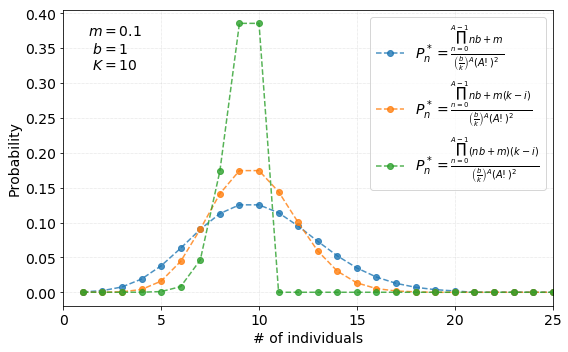

In [21]:
Stat1 = np.array(Stat1)/np.array(Stat1).sum()
Stat2 = np.array(Stat2)/np.array(Stat2).sum()
Stat3 = np.array(Stat3)/np.array(Stat3).sum()

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(A, Stat1, "o--", alpha=.8, label="$P_n^*=\\frac{\\prod_{n=0}^{A-1}nb+m}{\\left(\\frac{b}{k}\\right)^A(A!)^2}$")
ax.plot(A, Stat2, "o--", alpha=.8, label="$P_n^*=\\frac{\\prod_{n=0}^{A-1}nb+m(k-i)}{\\left(\\frac{b}{k}\\right)^A(A!)^2}$")
ax.plot(A, Stat3, "o--", alpha=.8, label="$P_n^*=\\frac{\\prod_{n=0}^{A-1}(nb+m)(k-i)}{\\left(\\frac{b}{k}\\right)^A(A!)^2}$")
ax.set_xlim(0, 25)
ax.set_xlabel("# of individuals", fontsize=14)
ax.set_ylabel("Probability", fontsize=14)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(0,0,1,1), fontsize=14)
ax.annotate("$m=0.1$ \n $b=1$ \n $K=10$", xy=(.05, .8), 
            xycoords="axes fraction", fontsize=14)
fig.tight_layout()
fig.savefig("./Figure/LogisticGrowth_all.pdf")


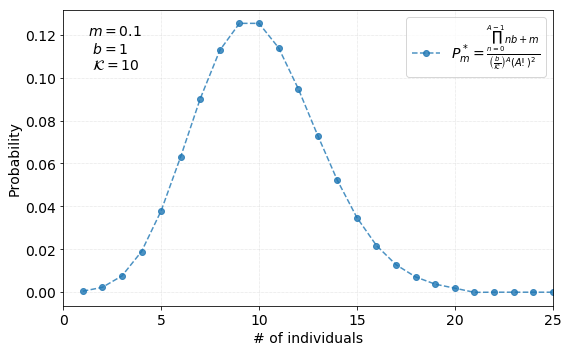

In [22]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(A, Stat1, "o--", alpha=.8, label="$P_m^*=\\frac{\\prod_{n=0}^{A-1}nb+m}{\\left(\\frac{b}{\\mathcal{K}}\\right)^A(A!)^2}$")
ax.set_xlim(0, 25)
ax.set_xlabel("# of individuals", fontsize=14)
ax.set_ylabel("Probability", fontsize=14)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(0,0,1,1), fontsize=14)
ax.annotate("$m=0.1$ \n $b=1$ \n $\\mathcal{K}=10$", xy=(.05, .8), 
            xycoords="axes fraction", fontsize=14)
fig.tight_layout()
fig.savefig("./Figure/LogisticGrowth.pdf")

In [23]:
# simulation using the Gillespie algoorithm
def simulation(A, b=1, k=10, m=0.1, n_iter=1000):
    a = [A]
    for i in range(n_iter):
        #print(A)
        birth = b*A+m
        death = b*A**2/k
        total = birth+death
        if np.random.rand() < birth/total:
            # birth reaction
            A += 1
            a.append(A)
        else:
            # death reaction
            A -= 1
            a.append(A)
    return a

In [24]:
test = simulation(A=5, n_iter=10**8)

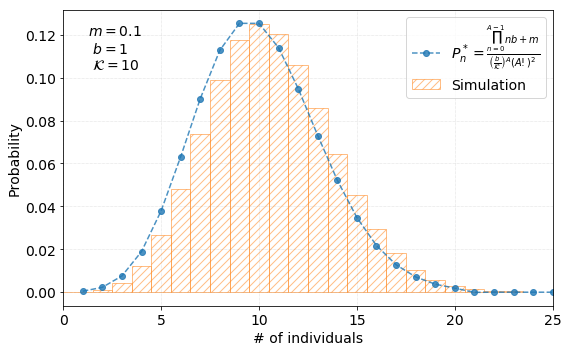

In [25]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(A, Stat1, "o--", alpha=.8, label="$P_n^*=\\frac{\\prod_{n=0}^{A-1}nb+m}{\\left(\\frac{b}{\\mathcal{K}}\\right)^A(A!)^2}$")
ax.hist(test, bins=[i for i in range(25)], density=True, label="Simulation", histtype='bar', ec='C1', alpha=.5, align="left", hatch="///", color="white",)
ax.set_xlim(0, 25)
ax.set_xlabel("# of individuals", fontsize=14)
ax.set_ylabel("Probability", fontsize=14)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(0,0,1,1), fontsize=14)
ax.annotate("$m=0.1$ \n $b=1$ \n $\\mathcal{K}=10$", xy=(.05, .8), 
            xycoords="axes fraction", fontsize=14)
fig.tight_layout()
fig.savefig("./Figure/LogisticGrowth_Simulation.pdf")